# Напишите заголовок проекта здесь

- Автор: Дарья
- Дата: 13.12.2024

## Задачи и цель проекта 

Изучить рынок заведений общественного питания Москвы, чтобы помочь инвесторам фонда "Shut Up and Take My Money" определить оптимальный формат заведения (кафе, ресторан, бар или пиццерия), его расположение, ценовую политику и основные характеристики.


1. Изучение структуры данных.
- Загрузить данные из предоставленных файлов и изучить их содержимое
- Оценить объем данных, проверить соответствие описанию, выявить пропуски и определить корректность типов данных
- Объединить два датасета в единый для дальнейшего анализа
2. Предобработка данных.
- Привести данные к нужным форматам
- Обработать пропущенные значения и дубликаты
- Добавить новый столбец, указывающий на круглосуточный режим работы заведений
3. Исследовательский анализ данных.
- Определить распределение заведений по категориям (кафе, рестораны, бары и т.д.) и районам Москвы
- Изучить соотношение сетевых и несетевых заведений, а также их распределение по категориям
- Провести анализ количества посадочных мест, среднего рейтинга и их зависимости от других характеристик (район, ценовая категория, круглосуточный режим)
- Исследовать вариации среднего чека по районам Москвы и их связь с удаленностью от центра города
- Найти топ-15 популярных сетей и изучить их основные характеристики
4. Детальный анализ пиццерий.
- Исследовать количество и распределение пиццерий по районам Москвы
- Определить типичные характеристики пиццерий (средний чек, количество посадочных мест, рейтинг, доля сетевых заведений)
- Изучить распределение сетевых и несетевых пиццерий в зависимости от округов




### Описание данных

**Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:**

`id` - идентификатор заведения;

`name` — название заведения;

`address` — адрес заведения;

`district` — административный район, в котором находится заведение, например Центральный административный округ;

`category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;

`hours` — информация о днях и часах работы;

`rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

`chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

0 — заведение не является сетевым;

1 — заведение является сетевым.

`seats` — количество посадочных мест.



**Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:**

`id` - идентификатор заведения;

`price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

`avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;

«Цена чашки капучино: 130–220 ₽»;

«Цена бокала пива: 400–600 ₽».

и так далее;

`middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

`middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Оглавление

<span class="tocSkip"></span>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задачи-и-цель-проекта" data-toc-modified-id="Задачи-и-цель-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задачи и цель проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Содержимое-проекта" data-toc-modified-id="Содержимое-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Содержимое проекта</a></span></li></ul></li><li><span><a href="#1.-Загрузка-данных-и-знакомство-с-ними" data-toc-modified-id="1.-Загрузка-данных-и-знакомство-с-ними-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Загрузка данных и знакомство с ними</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li><li><span><a href="#Подготовка-единого-датафрейма" data-toc-modified-id="Подготовка-единого-датафрейма-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка единого датафрейма</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-объектов-общественного-питания-по-категориям" data-toc-modified-id="Распределение-объектов-общественного-питания-по-категориям-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Распределение объектов общественного питания по категориям</a></span></li><li><span><a href="#Анализ-административных-районов-Москвы-и-заведений-общественного-питания" data-toc-modified-id="Анализ-административных-районов-Москвы-и-заведений-общественного-питания-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ административных районов Москвы и заведений общественного питания</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений</a></span></li><li><span><a href="#Анализ-количества-посадочных-мест-в-заведениях" data-toc-modified-id="Анализ-количества-посадочных-мест-в-заведениях-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ количества посадочных мест в заведениях</a></span></li><li><span><a href="#Анализ-рейтинга-заведений" data-toc-modified-id="Анализ-рейтинга-заведений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ рейтинга заведений</a></span></li><li><span><a href="#Корреляция-рейтинга-заведений" data-toc-modified-id="Корреляция-рейтинга-заведений-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Корреляция рейтинга заведений</a></span></li><li><span><a href="#Топ-15-популярных-сетей-в-Москве" data-toc-modified-id="Топ-15-популярных-сетей-в-Москве-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Топ-15 популярных сетей в Москве</a></span></li><li><span><a href="#Вариация-среднего-чека-заведения" data-toc-modified-id="Вариация-среднего-чека-заведения-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Вариация среднего чека заведения</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Детальное-исследование-пиццерий" data-toc-modified-id="Детальное-исследование-пиццерий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Детальное исследование пиццерий</a></span><ul class="toc-item"><li><span><a href="#Анализ-пиццерий-в-Москве" data-toc-modified-id="Анализ-пиццерий-в-Москве-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ пиццерий в Москве</a></span></li><li><span><a href="#Характеристика-типовой-пиццерии" data-toc-modified-id="Характеристика-типовой-пиццерии-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Характеристика типовой пиццерии</a></span></li><li><span><a href="#Распределение-сетевых-и-несетевых-пиццерий-в-округах-Москвы" data-toc-modified-id="Распределение-сетевых-и-несетевых-пиццерий-в-округах-Москвы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Распределение сетевых и несетевых пиццерий в округах Москвы</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#5.-Итоговый-вывод-и-рекомендации" data-toc-modified-id="5.-Итоговый-вывод-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>5. Итоговый вывод и рекомендации</a></span></li></ul></div>

---

## 1. Загрузка данных и знакомство с ними

- Для начала импортируем все нужные для проекта библиотеки:

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
!pip install phik

In [5]:
from phik import phik_matrix

- Загружаем данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [6]:
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv') #Загружаем датасет rest_info
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv') #Загружаем датасет rest_price

- **Познакомимся с данными датасета `/datasets/rest_info.csv`**

In [7]:
info_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [8]:
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


- Датафрейм `info_df` состоит из 8406 строк и 9 столбцов. Названия столбцов корректно записаны, значит их не нужно будет приводить к виду snake_case. 
- Столбцы со строковыми значениями `id`, `name`, `category`, `address`, `district`, `hours`, `price`, `avg_bill` нужно будет привести к нижнему регистру, чтобы найти возможные дубликаты.
- Типы данных выглядят корректными, за исключением `seats`, который хорошо бы было привести к целочисленному, но, так как в столбце много пропусков мы оставим `float64`. При попытке заменить пропуски на числовые индикаторы мы сильно исказим данные статистического анализа.
- 
По итогу явные пропуски содержатся в столбцах `hours` и `seats`. В `hours` их можно будет заменить на значение идентификатор `неизвестно`, так как далее этот столбец не будет принимать активного участия в анализе

- **Познакомимся с данными датасета `/datasets/rest_price.csv`**

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [10]:
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


В датафрейме 4058 строк и 5 столбцов.
- `id` - id заведения. По этому столбцу мы сможем в будущем связать два датафрейма. Пропусков нет, а тип данных корректный. 
- `price` - категория цен. Пропуски присутствуют, возможно отсутствует информация. Тип данных корректный, следует проверить уникальные значения, чтобы исключить возможные неявные дубликаты категорий.  
- `avg_bill` - средняя стоимость заказа в виде диапазона, тип данных задан корректно, пропуски присутствуют. 
- В `middle_avg_bill` и `middle_coffee_cup` значения, на первый взгляд, выглядят целочисленными. Присутствуют пропуски.

---

### Промежуточный вывод

Названия столбцов все представлены в соответствие со стилем snake_case. 
Данные содержат пропуски в нескольких столбцах:
- `hours` - пропуски можно заменить на `неизвестно`, так как это информация о времени работы.
- `seats`, `middle_avg_bill`, `middle_coffee_cup` - данные похожи на целочисленные, однако, заменить пропуски на значение-индикатор будет плохим решением, которое может сильно исказить статистические показатели.
- Также потребуется проверка уникальных значений для столбцов (`price`, `category`, `district`) и устранение возможных дубликатов.

### Подготовка единого датафрейма

- Объединяем данные двух датасетов в один. Выбираем тип соединения `left`, чтобы не потерять значительную долю информации в датафрейме `info_df`

In [11]:
df = pd.merge(info_df, price_df, on='id', how='left')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Можно заметить, что данных в датафрейме `price_df` было почти в половину меньше. Поэтому доля пропусков стала значительно больше. 

Проверим:

In [13]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Процент пропусков:

In [14]:
round(df.isna().mean().sort_values(ascending=False) * 100, 2)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64

Огромное количество пропусков в `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` объясняется, скорее всего, присоединением датафрейма с информацией только для половины id заведений. То есть для других заведений информация могла быть не добавлена. В связи с таким большим процентом пропусков (43-94%) было решено их оставить, чтобы не исказить статистические показатели значениями индикаторами. Здесь пропуски нам помешать не должны.

После объединения двух датасетов в один, у нас готов для работы единый датафрейм `df`, состоящий из 8406 строк и 13 столбцов. 
- `id` идентификатор заведения 
- `name` название заведения
- `category` категория заведения
- `address` адрес заведения
- `district` административный район, в котором находится заведение
- `hours` информация о днях и часах работы
- `rating` рейтинг заведения по оценкам пользователей в Яндекс Картах
- `chain` число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки)
- `seats` количество посадочных мест
- `price` категория цен в заведении
- `avg_bill` строка, которая хранит среднюю стоимость заказа в виде диапазона
- `middle_avg_bill` число с оценкой среднего чека
- `middle_coffee_cup` число с оценкой одной чашки кофе

## Предобработка данных

Подготовливаем данные к исследовательскому анализу:

- Типы данных в датасете выглядят корректными, за исключением столбцов `seats`, `middle_avg_bill` и `middle_coffee_cup`, которые хорошо бы было привести к целочисленному виду, но, так как в столбце много пропусков мы оставим `float64`. При попытке заменить пропуски на числовые индикаторы мы сильно исказим данные статистического анализа. Чтобы избежать искажения статистических показателей нам придется фильтровать датасет на каждом этапе анализа. Поэтому `оставляем типы данных такими, какие они есть`. Это не помешает анализу.

Приведем строковые данные в столбцах `id`, `name`, `category`, `address`, `district`, `hours`, `price`, `avg_bill` к нижнему регистру

In [15]:
for col in ['id', 'name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    df[col] = df[col].str.lower()

In [16]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,средний счёт:400–600 ₽,500.0,NaN


 - Проверим количество полных дубликатов, то есть полностью идентичных строк

In [17]:
df.duplicated().sum()

0

- Проверим строки, где id заведения одинаковый. Это будет указывать на дубликаты 

In [18]:
df.duplicated(subset='id').sum()

0

- Теперь проверим вариации дубликатов с одинаковым адресом и именем

In [19]:
df.duplicated(subset=['name','address']).sum()

4

- Мы нашли 4 дубликата. Теперь их надо удалить

In [20]:
df = df.drop_duplicates(subset=['name','address'])
df = df.reset_index() # переиндексирует строки, начиная с 0, чтобы избавиться от старых индексов

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8402 non-null   int64  
 1   id                 8402 non-null   object 
 2   name               8402 non-null   object 
 3   category           8402 non-null   object 
 4   address            8402 non-null   object 
 5   district           8402 non-null   object 
 6   hours              7867 non-null   object 
 7   rating             8402 non-null   float64
 8   chain              8402 non-null   int64  
 9   seats              4792 non-null   float64
 10  price              3315 non-null   object 
 11  avg_bill           3816 non-null   object 
 12  middle_avg_bill    3149 non-null   float64
 13  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 919.1+ KB


- Узнаем уникальные значения в `category`, `district`, `chain`, `price`. Данные в этих столбцах представляют собой категории, поэтому, узнав уникальные значения, мы сможем обнаружить значения-индикаторы пропусков

In [22]:
for col in ['category', 'district', 'chain', 'price']: 
    print(f'Уникальные значения в столбце {col}')
    print(f'{df[col].unique()}')

Уникальные значения в столбце category
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
Уникальные значения в столбце district
['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']
Уникальные значения в столбце chain
[0 1]
Уникальные значения в столбце price
[nan 'выше среднего' 'средние' 'высокие' 'низкие']


Уникальные значения корректные без неявных дубликатов, индикаторов пропущенных значений и аномалий. В столбце `price` встречаются пропуски. Они нам не мешают и трогать их мы не будем

 - Вспомним процент пропусков в датафрейме

In [23]:
for col in ['hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Процент пропущенных строк в столбце {col} составил - {round(df[col].isna().mean()*100, 2)}%')

Процент пропущенных строк в столбце hours составил - 6.37%
Процент пропущенных строк в столбце seats составил - 42.97%
Процент пропущенных строк в столбце price составил - 60.55%
Процент пропущенных строк в столбце avg_bill составил - 54.58%
Процент пропущенных строк в столбце middle_avg_bill составил - 62.52%
Процент пропущенных строк в столбце middle_coffee_cup составил - 93.63%


Все столбцы, за исключением `hours` и `avg_bill` нужны нам для последующего анализа. Учитывая большой процент пропусков мы:
- **не можем** удалить их, так как потеряем огромное количество информации
- **не можем** заменить значением-индикатором, так как сильно ухудшим качество и достоверность статистических показателей

Поэтому пока мы их оставляем

Заменим пропуски в `hours` на `неизвестно`, так как данные в этом столбце нам нужны лишь для обнаружения круглосуточных заведений, замена не испортит нужные нам показатели

In [24]:
df['hours'] = df['hours'].fillna('неизвестно')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8402 non-null   int64  
 1   id                 8402 non-null   object 
 2   name               8402 non-null   object 
 3   category           8402 non-null   object 
 4   address            8402 non-null   object 
 5   district           8402 non-null   object 
 6   hours              8402 non-null   object 
 7   rating             8402 non-null   float64
 8   chain              8402 non-null   int64  
 9   seats              4792 non-null   float64
 10  price              3315 non-null   object 
 11  avg_bill           3816 non-null   object 
 12  middle_avg_bill    3149 non-null   float64
 13  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 919.1+ KB


- Создадим новый столбец `is_24_7` булевого типа, который будет указывать на круглосуточные заведения. True - круглосуточные, False - не круглосуточные или с отсутствующей информацией о времени работы  

In [25]:
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8402 non-null   int64  
 1   id                 8402 non-null   object 
 2   name               8402 non-null   object 
 3   category           8402 non-null   object 
 4   address            8402 non-null   object 
 5   district           8402 non-null   object 
 6   hours              8402 non-null   object 
 7   rating             8402 non-null   float64
 8   chain              8402 non-null   int64  
 9   seats              4792 non-null   float64
 10  price              3315 non-null   object 
 11  avg_bill           3816 non-null   object 
 12  middle_avg_bill    3149 non-null   float64
 13  middle_coffee_cup  535 non-null    float64
 14  is_24_7            8402 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(8)
memory usage: 927.3+ KB


In [26]:
df['is_24_7'].sum() # узнаем количество круглосуточных заведений

730

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В ходе предобработки: 
- строковые данные в столбцах `id`, `name`, `category`, `address`, `district`, `hours`, `price`, `avg_bill` приведены к нижнему регистру
- изучены уникальные значения в столбцах `category`, `district`, `chain`, `price` - неявные дубликаты отсутствуют, значения корректы
- обнаружены и удалены дубликаты с одинаковыми данными в `name` и `adress`
- изучено процентное соотношение пропусков. Из-за большого процента пропущенных значений было принято решение оставить все как есть, за исключением пропусков в столбце `chain`. Данные в этом столбце нам не понадобятся в дальнейшем и замена не помешает анализу
- был создан новый столбец булевого типа `is_24_7`, который указывает является ли заведение круглосуточным или нет.

Изначально было 8406 строк и 13 столбцов, в ходе предобработки данных строк стало `8402`, а столбцов `14`, то есть мы удалили 4 строки или лишились ~ 0.05% строк.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8402 non-null   int64  
 1   id                 8402 non-null   object 
 2   name               8402 non-null   object 
 3   category           8402 non-null   object 
 4   address            8402 non-null   object 
 5   district           8402 non-null   object 
 6   hours              8402 non-null   object 
 7   rating             8402 non-null   float64
 8   chain              8402 non-null   int64  
 9   seats              4792 non-null   float64
 10  price              3315 non-null   object 
 11  avg_bill           3816 non-null   object 
 12  middle_avg_bill    3149 non-null   float64
 13  middle_coffee_cup  535 non-null    float64
 14  is_24_7            8402 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(8)
memory usage: 927.3+ KB


Описание итогового датафрейма
- `id` идентификатор заведения 
- `name` название заведения
- `category` категория заведения
- `address` адрес заведения
- `district` административный район, в котором находится заведение
- `hours` информация о днях и часах работы
- `rating` рейтинг заведения по оценкам пользователей в Яндекс Картах
- `chain` число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки)
- `seats` количество посадочных мест
- `price` категория цен в заведении
- `avg_bill` строка, которая хранит среднюю стоимость заказа в виде диапазона
- `middle_avg_bill` число с оценкой среднего чека
- `middle_coffee_cup` число с оценкой одной чашки кофе
- `is_24_7` является ли заведение круглосуточным. True - да, False - нет

## Исследовательский анализ данных


---

### Распределение объектов общественного питания по категориям 

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [29]:
count_id = df['id'].count()
print(f'''Количество всех заведений в датасете - {count_id}''')

Количество всех заведений в датасете - 8402


- Группируем данные по категориям и считаем количество заведений, сортируя данные по убыванию

In [30]:
count_category = df.groupby('category')['id'].count().sort_values(ascending=False)
print(f'''Количество заведений в абсолютном количестве по каждой категории:
{count_category}''')

Количество заведений в абсолютном количестве по каждой категории:
category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64


In [31]:
print(f'''Количество заведений в процентах по каждой категории:
{round((count_category/count_id * 100), 2).sort_values(ascending=False)}''')

Количество заведений в процентах по каждой категории:
category
кафе               28.28
ресторан           24.30
кофейня            16.82
бар,паб             9.09
пиццерия            7.53
быстрое питание     7.18
столовая            3.75
булочная            3.05
Name: id, dtype: float64


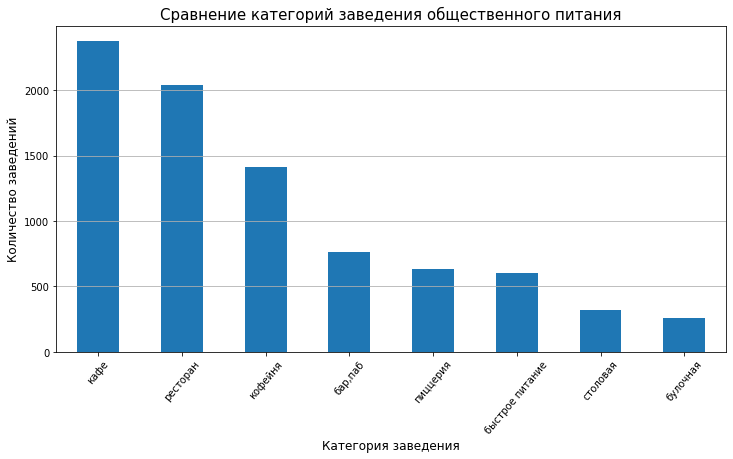

In [32]:
#строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar', rot=50)
plt.title('Сравнение категорий заведения общественного питания', fontsize=15)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.grid(axis='y')
plt.show()

**Вывод:**

- больше всего представлено заведений типа кафе, ресторанов и кофеен. Кафе и кофейни обычно привлекают посетителей доступными ценами и удобством для повседневных встреч. Рестораны, в свою очередь, обычно выбирают для проведения крупных мероприятий, деловых обедов и семейных ужинов
- самыми непопулярными форматами оказались булочные и столовые. Возможно, это связано с тем, что потребности, которые раньше удовлетворяли столовые, теперь удовлетворяют заведения быстрого питания, а булочные изделия, как правило, обязательно бывают в кофейнях

---

### Анализ административных районов Москвы и заведений общественного питания

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

- сгруппируем количество заведений по административным районам Москвы и отсортируем по убыванию

In [33]:
count_by_district = df.groupby('district')['id'].count().sort_values(ascending=False)
print(f'''Количество заведений по административным районам Москвы в абсолютных значениях:
{count_by_district}''')

Количество заведений по административным районам Москвы в абсолютных значениях:
district
центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: id, dtype: int64


In [34]:
print(f'''Количество заведений по административным районам Москвы в процентах:
{round(count_by_district/count_id * 100, 2)}''')

Количество заведений по административным районам Москвы в процентах:
district
центральный административный округ         26.68
северный административный округ            10.69
южный административный округ               10.62
северо-восточный административный округ    10.59
западный административный округ            10.12
восточный административный округ            9.50
юго-восточный административный округ        8.50
юго-западный административный округ         8.44
северо-западный административный округ      4.87
Name: id, dtype: float64


- больше всего заведений в центральном административном округе, что объясняется большим числом туристов и развитой инфраструктурой в центре города.
- меньше всего в северо-западном административном округе, возможно, это объясняется количеством лесопарков и преобладанием жилых районов

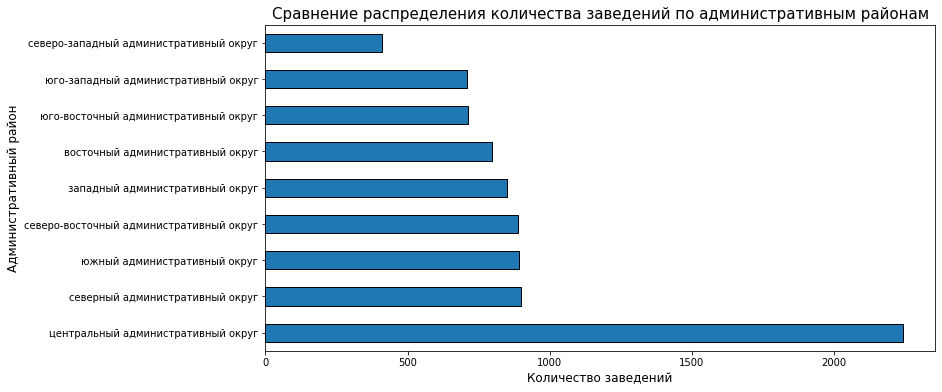

In [35]:
plt.figure(figsize=(12, 6))
df['district'].value_counts().plot(kind='barh', rot=0, edgecolor= 'black')
plt.title('Сравнение распределения количества заведений по административным районам', fontsize=15)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Административный район', fontsize=12)
plt.show()

- Теперь рассмотрим распределение заведений каждой категории в Центральном административном округе Москвы

In [36]:
# создаем отфильтрованный по данным ЦАО датафрейм
filtered_df = df[df['district'] == 'центральный административный округ'] 
# группируем количество заведений по категориям 
filtered_df.groupby('category')['id'].count().sort_values(ascending=False) 

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

- Больше всего ресторанов, а меньше всего заведений быстрого питания, столовых и булочных, то есть заведений с достаточно недорогими ценами 

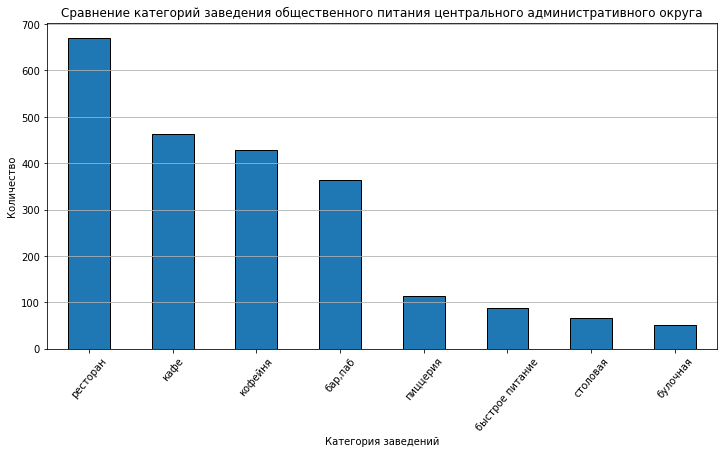

In [37]:
plt.figure(figsize=(12, 6))
filtered_df['category'].value_counts().plot(kind='bar', edgecolor='black', rot=50)
plt.title('Сравнение категорий заведения общественного питания центрального административного округа')
plt.xlabel('Категория заведений')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

**Вывод:**

В датасете присутствуют данные о 9 округах Москвы:

- центральный административный округ
- северный административный округ             
- южный административный округ                
- северо-восточный административный округ     
- западный административный округ            
- восточный административный округ           
- юго-восточный административный округ       
- юго-западный административный округ         
- северо-западный административный округ

В центральном административном округе Москвы преобладают рестораны, кафе и кофейни. Возможно это связано с высокой деловой и туристической активностью, а также концентрацией офисов, гостиниц и достопримечательностей.

Больше всего заведений в центральном административном округе, а меньше всего в северо-западном административном округе.

---

### Соотношение сетевых и несетевых заведений 

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

- сгруппируем количество заведений по сетевым и несетевым


**0 - несетевые 1 - сетевые**

In [38]:
df.groupby('chain')['id'].count().sort_values(ascending=False)

chain
0    5199
1    3203
Name: id, dtype: int64

- Несетевых заведений больше чем сетевых. Несетевые заведения составляют примерно 62%, когда сетевые всего 38% 

- Для наглядности построим круговую диаграмму

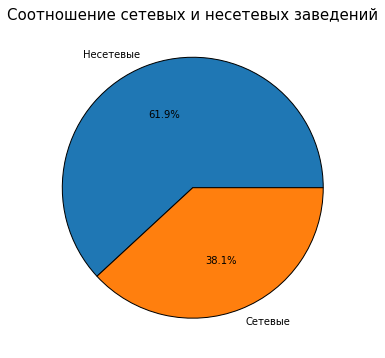

In [39]:
plt.figure(figsize=(10, 6))
df['chain'].value_counts().plot(kind='pie', 
                  autopct='%.1f%%',  
                  labels=['Несетевые', 'Сетевые'],  
                  wedgeprops={'edgecolor': 'black'}) 

plt.title('Соотношение сетевых и несетевых заведений', fontsize=15)
plt.ylabel('')
plt.show()

- теперь рассмотрим каждую категорию в разрезе сетевых и несетевых заведений

In [40]:
grouped_chain = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped_chain

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


- сетевые заведения чаще встречаются в категориях, где важно быстрое обслуживание и более привычная еда (булочные, кофейни и пиццерии).  В то же время, несетевые заведения преобладают в кафе, барах и ресторанах, где больше акцент идет на индивидуальность.
- в столовых преобладают несетевые заведения, возможно это связано с тем, что сейчас этот формат теряет популярность и расширять бизнес, создавая сеть столовых, не особо выгодно.

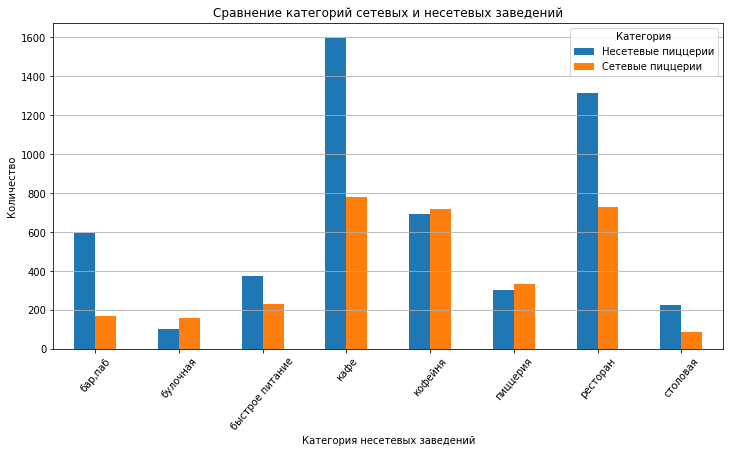

In [41]:
grouped_chain.plot(kind='bar', rot=50, figsize=(12, 6))
plt.title('Сравнение категорий сетевых и несетевых заведений')
plt.xlabel('Категория несетевых заведений')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.legend(['Несетевые пиццерии', 'Сетевые пиццерии'], title='Категория')
plt.show()

- теперь изучим какие категории заведений чаще являются сетевыми.

- для начала вспомним общее количество заведений в каждой категории

In [42]:
total_by_category = df.groupby('category')['id'].count().sort_values(ascending=False)
print(f'''Общее количество заведений в каждой категории: 
{total_by_category}''')

Общее количество заведений в каждой категории: 
category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64


- теперь отобразим количество сетевых заведений в каждой категории

In [43]:
chain_by_category = df[df['chain'] == 1].groupby('category')['id'].count().sort_values(ascending=False)
print(f'''Количество сетевых заведений в каждой категории: 
{chain_by_category}''')

Количество сетевых заведений в каждой категории: 
category
кафе               779
ресторан           729
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            168
булочная           157
столовая            88
Name: id, dtype: int64


- узнаем процент сетевых заведений в каждой категории

In [44]:
chain_percentage = round((chain_by_category / total_by_category * 100), 2).sort_values(ascending=False)
print(f'''Процентное соотношение сетевых заведений:
{chain_percentage}''')

Процентное соотношение сетевых заведений:
category
булочная           61.33
пиццерия           52.13
кофейня            50.96
быстрое питание    38.47
ресторан           35.70
кафе               32.79
столовая           27.94
бар,паб            21.99
Name: id, dtype: float64


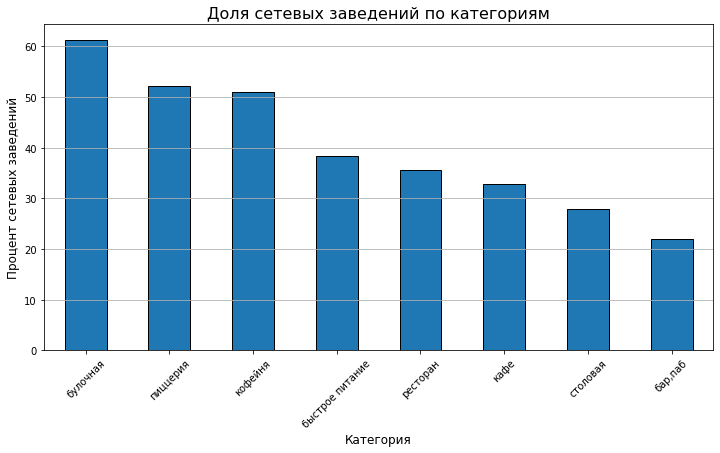

In [45]:
chain_percentage.plot(kind='bar', figsize=(12, 6), edgecolor='black', rot=45)
plt.title('Доля сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Процент сетевых заведений', fontsize=12)
plt.grid(axis='y')
plt.show()

- Больше половины всех булочных и пиццерий на рынке представлено в формате сетевых заведений -  61.33% и 52.13% соответственно
- Среди баров и пабов доля сетевых заведений самая низкая - 21.99% 

**Вывод:**

- Можно отметить, что сетевые кафе, рестораны и кофейни сильно вырываются вперед по количеству. Эта тройка лидеров на рынке заведений общественного питания, как мы выяснили в предыдущих исследованиях.
- Однако, если рассматривать данные в процентном соотношении, лидерами по доле сетевых заведений оказываются булочные (61.33%) и пиццерии (52.13%). Это значит, что более половины булочных и пиццерий представлены именно в сетевом формате, что указывает на высокую масштабируемость этих форматов.
- Кафе и рестораны, несмотря на лидирующие позиции по количеству, имеют меньший процент сетевых заведений (35.70% и 32.79% соответственно). Это может быть связано с тем, что независимые заведения в этих категориях стремятся выделяться за счет уникальной кухни и атмосферы.
- Наименьшая доля сетевых заведений наблюдается у баров и пабов (21.99%), что подчеркивает их локальную направленность и ориентацию на уникальность. Аналогичная ситуация со столовыми (27.94%), которые зачастую работают в контексте обслуживания конкретных учреждений или предприятий.

---

### Анализ количества посадочных мест в заведениях

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [46]:
print(f'''Статистические показатели столбца seats:
{df['seats'].describe()}''')

Статистические показатели столбца seats:
count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


- Медиана (50%) равна 75 - это указывает на то, что половина заведений имеют меньше 75 посадочных мест. Разница между медианой и средним значением (108) указывает на наличие заведений с большим числом мест, которые увеличивают среднее.
- Максимальное значение (1288 мест) сильно превышает верхний квартиль (75% - 140 мест), что может указывать на наличие выбросов — например, крупные рестораны, столовые или залы для банкетов.
- Большое стандартное отклонение (122.8) указывает на значительный разброс в данных. Заведения могут сильно отличаться по количеству посадочных мест. Учитывая тот факт, что мы рассматриваем разные форматы заведений, такое возможно, ведь у нас есть минимальное количество посадочных мест - 0

Хотелось бы подробнее изучить крупные значения посадочных мест. К примеру выведем первые 5 строк из датасета, где значение сидячих мест больше 1000

In [47]:
df[df['seats'] > 1000].head(5)

,index,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
2710,2713,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",восточный административный округ,"ежедневно, 11:00–06:00",4.2,0,1040.0,высокие,средний счёт:1000–2500 ₽,1750.0,NaN,False
2719,2722,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",восточный административный округ,"ежедневно, 10:00–22:00",4.3,1,1040.0,NaN,NaN,NaN,NaN,False
2767,2770,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",восточный административный округ,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,1,1040.0,NaN,NaN,NaN,NaN,False
2963,2966,6b611f2fc2084078952aaef40780f11c,матрешка,кафе,"москва, измайловское шоссе, 71, корп. а",восточный административный округ,неизвестно,4.0,0,1040.0,NaN,NaN,NaN,NaN,False
4227,4231,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",западный административный округ,"ежедневно, 12:00–23:00",4.2,0,1200.0,высокие,средний счёт:2500–5000 ₽,3750.0,NaN,False


Для первых 4 строк указан одинаковый адрес. Эти заведения располагаются в здании отеля Альфа Измайлово, возможно, что для них поставили заглушки такого рода. Проверим уникальные значения в данных столбца `seats`, которые превышают 499 посадочнх мест. 

In [48]:
df_sorted_seats = df[df['seats'] > 499]
df_sorted_seats['seats'].unique()

array([ 500.,  625., 1040.,  660.,  920., 1200.,  585.,  760.,  650.,
        600., 1288.,  644.,  675.])

Изучим заведения с количеством посадочных мест 500

In [49]:
df[df['seats'] == 500].head(5)

,index,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
897,898,65bac088dfbb4a4e951378291da55c45,ош,кафе,"москва, ярославское шоссе, 114, корп. 1",северо-восточный административный округ,пн-сб 09:00–23:00; вс 10:00–22:00,4.3,1,500.0,NaN,NaN,NaN,NaN,False
1063,1064,0669ac8b94d04dd9a5c61619c87013ff,восток,кафе,"москва, ярославское шоссе, 19, стр. 1",северо-восточный административный округ,"ежедневно, 10:00–18:00",4.3,1,500.0,NaN,NaN,NaN,NaN,False
1112,1113,6e4040fc95b745de83803aebbd12e1f6,кафе при азс,кафе,"москва, ярославское шоссе, 1, корп. 1",северо-восточный административный округ,неизвестно,3.5,0,500.0,NaN,NaN,NaN,NaN,False
1750,1752,dae4ff8361f644358bb9c9617a8a8f95,soul in the bowl,ресторан,"москва, лесная улица, 20, стр. 3",центральный административный округ,"ежедневно, 10:00–23:00",4.7,1,500.0,средние,средний счёт:700–850 ₽,775.0,NaN,False
1790,1792,76f147374e874167acb8f40457859d7b,бансонс бургер китчен,ресторан,"москва, лесная улица, 20, стр. 3",центральный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–02:00; вс 10:00...",5.0,0,500.0,NaN,средний счёт:500–1000 ₽,750.0,NaN,False


- `soul in the bowl` и `бансонс бургер китчен`, судя по адресу, расположены в тц и к еще одним возможным причинам добавляются количество всех сидячих мест на фудкорте
- `ош` и `кафе при азс` расположены вообще при жилом доме и заправке, соответственно. Возможно это можно отнести к ошибкам в данных.

In [50]:
df[df['seats'] == 1288].head(5)

,index,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6514,6518,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",западный административный округ,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,средний счёт:1500–2000 ₽,1750.0,NaN,True
6520,6524,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,выше среднего,средний счёт:1500 ₽,1500.0,NaN,False
6570,6574,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,False
6637,6641,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",западный административный округ,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,False
6654,6658,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,средние,средний счёт:700 ₽,700.0,NaN,False


Все заведения с максимальной рассадкой находятся на территории больших ЖК. Возможно, указанные 1288 мест — это общая вместимость помещений

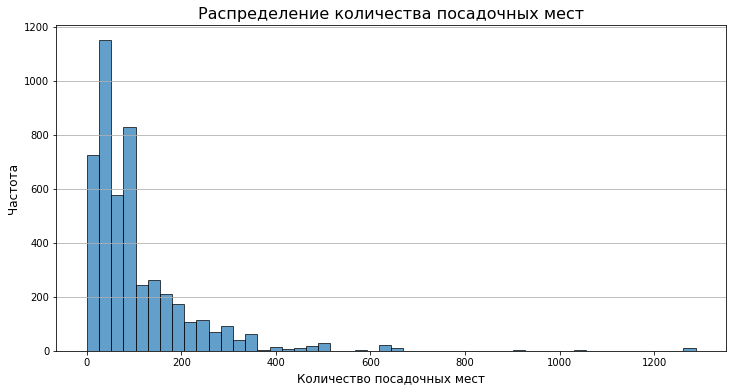

In [51]:
plt.figure(figsize=(12, 6))
plt.hist(df['seats'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение количества посадочных мест', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y')
plt.show()

- Значения распределения количества посадочных мест на гистограмме правоасимметричные, правый хвост говорит о том, что в данных присутствуют значения сильно выше средних.

Как мы выяснили, это может быть связано со многими факторами: общая численность посадочных мест в ТЦ или крупных ЖК, технические заглушки или ошибки данных.

In [52]:
df['seats'].mode()

0    40.0
dtype: float64

- Наиболее часто встречаемое значение посадочных мест - 40. На гистограмме также видно пик значений в районе 40.

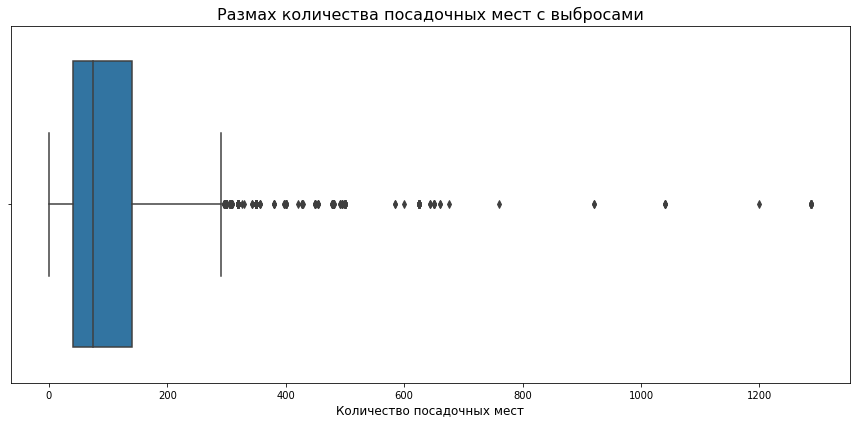

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='seats')
plt.title('Размах количества посадочных мест с выбросами', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.tight_layout()
plt.show()

- На диаграмме размаха или же боксплоте мы видим большое наличие выбросов в правой части, значения `от 40 до 140` включают основную массу данных. Это диапазон, который мы можем называть основным "ядром" данных или же IQR (межквартильном размахе). Он определяется как разница между 75-м процентилем и 25-м процентилем данных.

Для лучшей демонстрации IQR уберем выбросы с боксплота

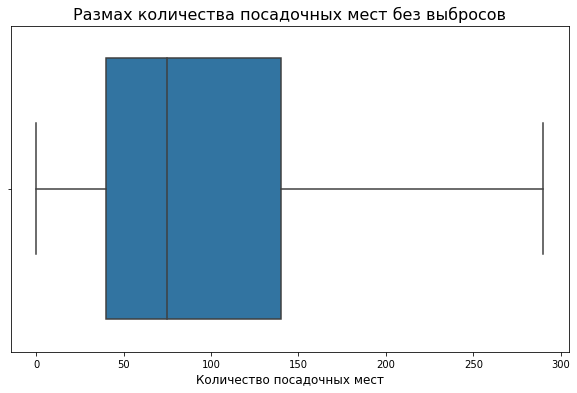

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='seats', showfliers=False)
plt.title('Размах количества посадочных мест без выбросов', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.show()

Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Изучим медиану для каждого значения

In [55]:
pivot_category = pd.pivot_table(df,
                                index='category',
                                values='seats',
                                aggfunc='median')
pivot_category.sort_values(by='seats', ascending=False)


,seats
category,
ресторан,86.0
"бар,паб",82.0
кофейня,80.0
столовая,75.5
быстрое питание,65.0
кафе,60.0
пиццерия,55.0
булочная,50.0


- Медианные значения количества посадочных мест для разных категорий заведений показывают, что рестораны, бары и кофейни в среднем имеют больше мест для гостей. Это может быть связано с тем, что в таких заведениях люди обычно проводят больше времени, и поэтому требуется больше мест для комфортного размещения. В то же время, для кафе, пиццерий и булочных медианное количество посадочных мест ниже, что скорее всего связано с концепцией быстрого обслуживания, где поток клиентов высок, а время пребывания — короткое. 

Помимо медианы мы можем изучить моду для каждой категории. Благодаря моде мы найдем значение, которое встречается чаще всего.

In [56]:
def mode_category(list_category):
    """
    Функция принимает list_category - список уникальных значений в столбце. 
    Затем с помощью цикла мы создаем датафрейм состоящий из данных конкректного уникального значения в столбце category.
    Для столбца seats находим моду и выводим строку с информацией о категории и моде количества мест
    """
    for s in list_category:
        func_df = df[df['category'] == s]
        value = func_df['seats'].mode()[0]
        print(f'{s} - {int(value)}')
    return

In [57]:
df_un = df['category'].unique() #список уникальных значений столбца category
mode_category(df_un)

кафе - 40
ресторан - 100
кофейня - 100
пиццерия - 40
бар,паб - 60
быстрое питание - 0
булочная - 0
столовая - 40


- для ресторанов и кофеен характерно одинаковое значение моды - 100 мест, что, вероятно, связано с их популярностью и необходимостью размещения большого числа гостей. Для кафе, пиццерий, столовых и баров мода ниже (40–60 мест), что соответствует их меньшему размеру или ориентацию на обслуживание меньших групп людей. В категориях быстрого питания и булочных значения равны нулю, что может быть вызвано отсутствием данных или особенностями структуры этих заведений, например, без посадочных мест, где заказ делается на вынос или через окошко выдачи.

**Вывод**

- Основная масса заведений имеет количество посадочных мест в диапазоне от 40 до 140. Рестораны, бары и кофейни выделяются на фоне остальных категорий, так как имеют высокие показатели. Это связано с их популярностью, длительностью пребывания гостей и необходимостью размещения большого числа посетителей одновременно.
- Булочные демонстрируют самые низкие показатели по количеству посадочных мест. Возможно это объясняется спецификой их формата, ориентированного на заказы навынос или минимальное количество столиков.
- Выбросы начинаются от 290 (Q3 + IQR * 1.5 // 140 + 100 * 1.5)
- Наличие выбросов, таких как заведения с нулевым количеством мест или значительным превышением типичных значений, может быть связано с особенностями расположения заведений, ошибками в данных или спецификой индивидуальных случаев. Стоит провести дополнительное детальное исследование, чтобы установить точную причину.

---

### Анализ рейтинга заведений

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [58]:
print(f'''Статистические показатели столбца seats:
{round(df['rating'].describe(), 2)}''')

Статистические показатели столбца seats:
count    8402.00
mean        4.23
std         0.47
min         1.00
25%         4.10
50%         4.30
75%         4.40
max         5.00
Name: rating, dtype: float64


- среднее значение 4.23, что указывает на то, что заведения в целом получают высокие оценки
- стандартное отклонение 0.47 показывает, что разброс рейтингов относительно небольшой и большинство значений находятся близко к среднему
- медиана 4.3 и близка к среднему значению, что говорит об отсутствии сильного перекоса в распределении данных.

In [59]:
avg_rating_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(f'''Средний рейтинг:
{round(avg_rating_category, 2)}''')

Средний рейтинг:
category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64


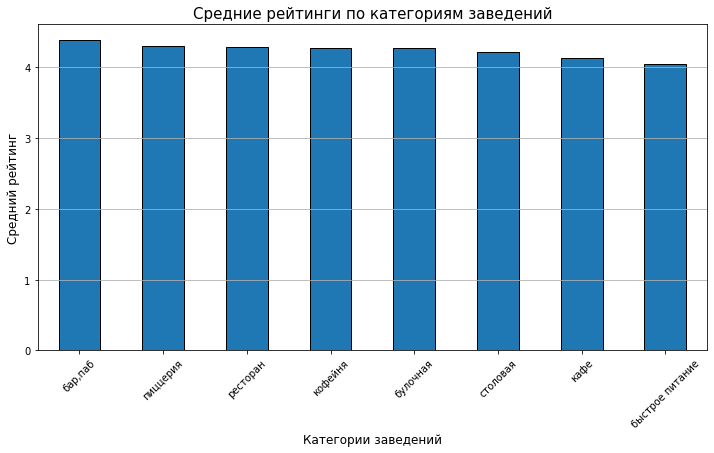

In [60]:
plt.figure(figsize=(12, 6))
avg_rating_category.plot(kind='bar', edgecolor='black', rot=45)
plt.title('Средние рейтинги по категориям заведений', fontsize=15)
plt.xlabel('Категории заведений', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.grid(axis='y')
plt.show()

**Вывод**
- различия между средними рейтингами для разных категорий заведений невелики, примерно от 4.05 до 4.39, что свидетельствует о высоком уровне удовлетворённости клиентов вне зависимости от категории заведения.
- наибольший средний рейтинг (4.39) наблюдается у баров и пабов. На втором месте находятся пиццерии (4.30). Вполне возможно, что высокие рейтинги баров и пиццерий могут быть связаны с тем, что посетители выбирают эти заведения с конкретной целью — насладиться определёнными блюдами или напитками. Таким образом, вероятность низкой оценки из-за непривычной кухни или неожиданных вкусовых предпочтений минимизируется. 
- Низшую позицию занимает категория "быстрое питание", что может быть связано с их ориентированностью на скорость обслуживания, иногда в ущерб качеству еды.

---

### Корреляция рейтинга заведений

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [61]:

columns_corr = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
columns_corr.loc[columns_corr.index != 'rating'][['rating']].sort_values(by='rating', ascending=False) # убираем корреляцию rating с rating

interval columns not set, guessing: ['rating', 'chain', 'seats']


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


- `.phik_matrix()` в качестве метода для построения матрицы корреляции был выбран, так как он анализирует насколько сильно две переменные связаны, независимо от типов данных. Так как `price`, `district`, `category` имеют строковые данные - метод .corr() не подошел бы

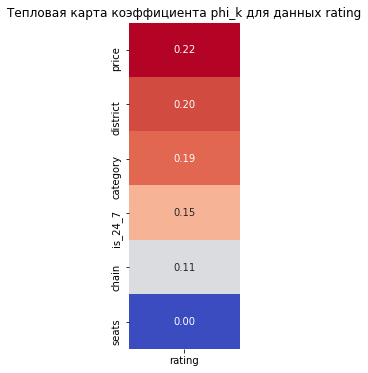

In [62]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))
data_heatmap = columns_corr.loc[columns_corr.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', 
            cbar=False # Отключаем цветовую шкалу
           )
plt.title('Тепловая карта коэффициента phi_k для данных rating')
plt.show()

- мы видим, что наиболее сильная связь наблюдается `между ценовой категорией и рейтингом заведения`. Изучим эту связь.
- вторая по силе связи – это административный район, где расположено заведение. Возможно, некоторые районы имеют репутацию лучших для посещения заведений, поэтому расположение также может влиять.
- третья значимая связь – это категория заведения. Например, рестораны высокой кухни могут получать более высокие оценки, чем фаст-фуд или столовые.

In [63]:
grouped_rating = df.groupby('price')['rating'].mean().sort_values(ascending=False) # группируем средние значения рейтингов по ценовой категории
round(grouped_rating, 2)

price
высокие          4.44
выше среднего    4.39
средние          4.30
низкие           4.17
Name: rating, dtype: float64

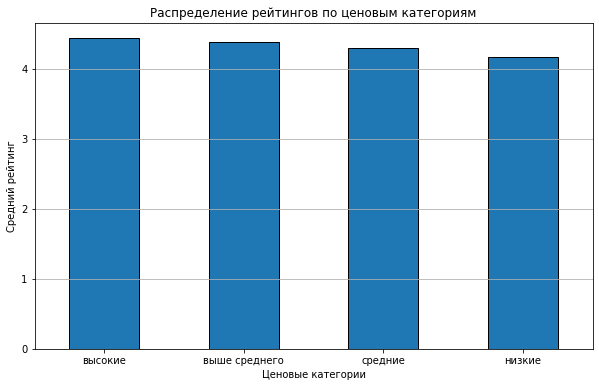

In [64]:
# Строим столбчатую диаграмму
grouped_rating.plot(
    kind='bar',
    edgecolor='black',
    rot=0,
    figsize=(10, 6)
)

plt.title('Распределение рейтингов по ценовым категориям', fontsize=12)
plt.grid(axis='y')
plt.xlabel('Ценовые категории')
plt.ylabel('Средний рейтинг')
plt.show()

Можно заметить, что чем выше ценовая категория, тем выше средний рейтинг. Возможно заведения с более высокой ценовой категорией предлагают лучшее обслуживание и качество еды, что, в свою очередь, отражается на высоких рейтингах.

**Вывод** 

- была построена матрица корреляции с использованием метода `.phik_matrix()`.
- наиболее сильная связь (0.22) выявлена между ценовой категорией и рейтингом заведений. 
- было выявлено, что заведения с более высокой ценовой категорией получают, как правило, более высокие оценки. 

---

### Топ-15 популярных сетей в Москве

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [65]:
filtered_chain = df[df['chain'] == 1] # фильтруем, чтобы оставить именно сетевые заведения
top_15 = filtered_chain.groupby('name')['id'].count().sort_values(ascending=False).head(15)
top_15

name
шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му-му                                   27
Name: id, dtype: int64

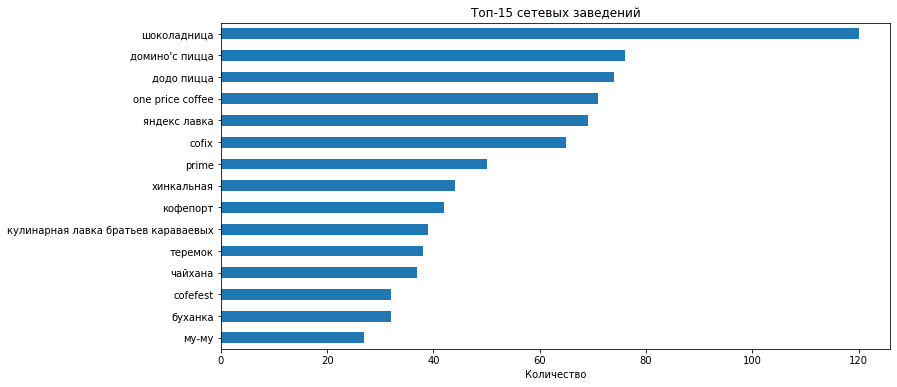

In [66]:
top_15.plot(kind='barh', rot=0, figsize=(12, 6))
plt.title('Топ-15 сетевых заведений', fontsize=12)
plt.xlabel('Количество')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

- для подсчета среднего рейтинга для топ-15 понадобятся названия этих заведений

In [67]:
top_15_names = top_15.index.tolist() # получаем список названий заведений из топ-15
top_15_names 

['шоколадница',
 "домино'с пицца",
 'додо пицца',
 'one price coffee',
 'яндекс лавка',
 'cofix',
 'prime',
 'хинкальная',
 'кофепорт',
 'кулинарная лавка братьев караваевых',
 'теремок',
 'чайхана',
 'cofefest',
 'буханка',
 'му-му']

In [68]:
df_top = df[df['name'].isin(top_15_names)] # отфильтруем датафрейм для топ-15 заведений

average_ratings = df_top.groupby('name')['rating'].mean().sort_values(ascending=False) # посчитаем средний рейтинг для этих заведений
average_ratings


name
буханка                                4.396875
кулинарная лавка братьев караваевых    4.394872
хинкальная                             4.322727
додо пицца                             4.286486
му-му                                  4.229630
шоколадница                            4.177500
домино'с пицца                         4.171429
кофепорт                               4.147619
теремок                                4.123684
prime                                  4.116000
cofix                                  4.075385
one price coffee                       4.069444
cofefest                               3.984375
чайхана                                3.924324
яндекс лавка                           3.872464
Name: rating, dtype: float64

- Наибольший рейтинг у сети `буханка`, затем `кулинарная лавка братьев караваевых` и `хинкальная`
- Наименьший рейтинг у `яндекс-лавки`, `чайханы` и  `cofefest`

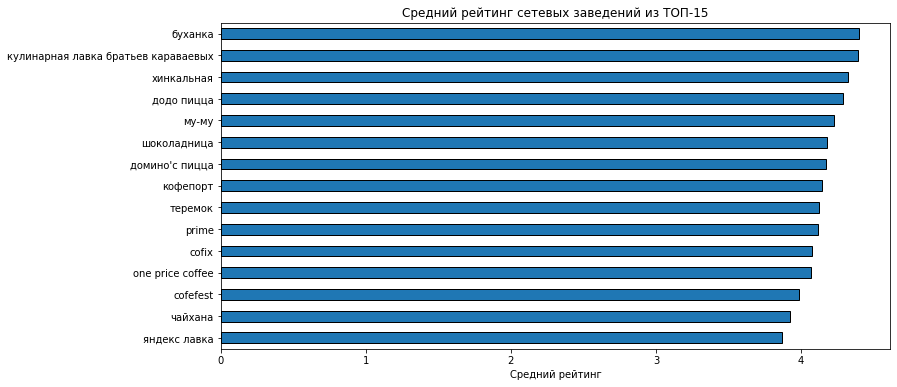

In [69]:
# Строим линейчатую диаграмму
average_ratings.plot(
    kind='barh',
    edgecolor='black',
    rot=0,
    figsize=(12, 6)
)

plt.title('Средний рейтинг сетевых заведений из ТОП-15', fontsize=12)
plt.xlabel('Средний рейтинг')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

In [70]:
top = df_top['category'].value_counts()
top.columns = ['category', 'count']
top

кофейня            337
ресторан           186
пиццерия           152
кафе               100
булочная            25
быстрое питание     12
бар,паб              4
столовая             2
Name: category, dtype: int64

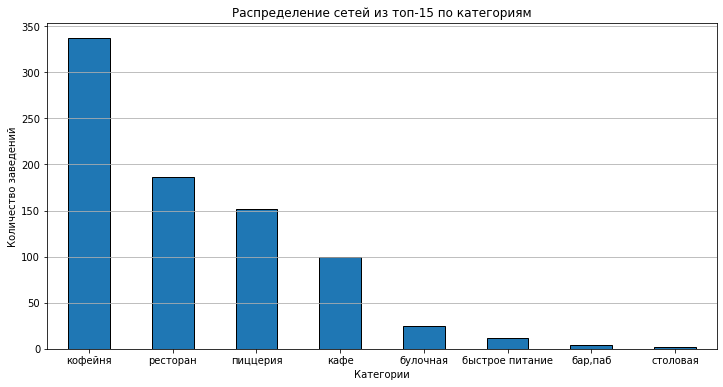

In [71]:
# Строим столбчатую диаграмму
top.plot(
    kind='bar',
    edgecolor='black',
    rot=0,
    figsize=(12, 6)
)

plt.title('Распределение сетей из топ-15 по категориям', fontsize=12)
plt.grid(axis='y')
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
plt.show()

- Можно заметить, что среди 15 популярных сетей больше всего заведений категории `кофейня`, а меньше всего столовых. 
- Довольно много ресторанов, пиццерий и кафе.


Изучим детальнее данные и построим сводную таблицу, чтобы видеть распределение категорий в каждой сети

In [72]:
# строим сводную таблицу
pd.pivot_table(df_top,
                 index=['name', 'category'],
                 values='id',
                 aggfunc='count'
                )

id
name                                category            
cofefest                            кафе               1
                                    кофейня           31
cofix                               кофейня           65
one price coffee                    кофейня           72
prime                               кафе               1
                                    ресторан          49
буханка                             булочная          25
                                    кафе               1
                                    кофейня            6
додо пицца                          пиццерия          74
домино'с пицца                      пиццерия          77
кофепорт                            кофейня           42
кулинарная лавка братьев караваевых кафе              39
му-му                               бар,паб            1
                                    быстрое питание    2
                                    кафе              12
                                    кофейня            2
                                    пиццерия           1
                                    ресторан           8
                                    столовая           1
теремок                             быстрое питание    2
                                    ресторан          36
хинкальная                          бар,паб            3
                                    быстрое питание    6
                                    кафе              19
                                    ресторан          15
                                    столовая           1
чайхана                             быстрое питание    2
                                    кафе              26
                                    ресторан           9
шоколадница                         кафе               1
                                    кофейня          119
яндекс лавка                        ресторан          69

**Вывод**

- Многие сетевые заведения из топ-15 состоят из разных категорий.
- Больше всего заведений из 15 популярных сетей занимают категории формата `кофейня`, далее `ресторан` и тройку лидеров завершает `пиццерия`

---

### Вариация среднего чека заведения

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


- Построим сводную таблицу с данными среднего чека по каждому району Москвы. Всего районов 9.

In [73]:
round(df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False), 2)

district
центральный административный округ         1191.06
западный административный округ            1053.23
северный административный округ             927.96
южный административный округ                834.40
северо-западный административный округ      822.22
восточный административный округ            820.63
юго-западный административный округ         792.56
северо-восточный административный округ     716.61
юго-восточный административный округ        654.10
Name: middle_avg_bill, dtype: float64

- В центральном районе отмечается наибольший средний чек
- На втором месте западный административный округ
- На третьем месте северный административный округ
- Юго-восточный административный округ имеет наименьший средний чек

Построим сводную таблицу с данными медианного значения среднего чека по каждому району Москвы. 

In [74]:
df.groupby('district')['middle_avg_bill'].agg('median').sort_values(ascending=False)

district
западный административный округ            1000.0
центральный административный округ         1000.0
северо-западный административный округ      700.0
северный административный округ             650.0
юго-западный административный округ         600.0
восточный административный округ            575.0
северо-восточный административный округ     500.0
южный административный округ                500.0
юго-восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

- Изучая медианное значение среднего чека мы приходим к таким же результатам. Лидеры - `центральный административный округ` и `западный административный округ`
- Наименьшее значение наблюдается в `юго-восточном административном округе`

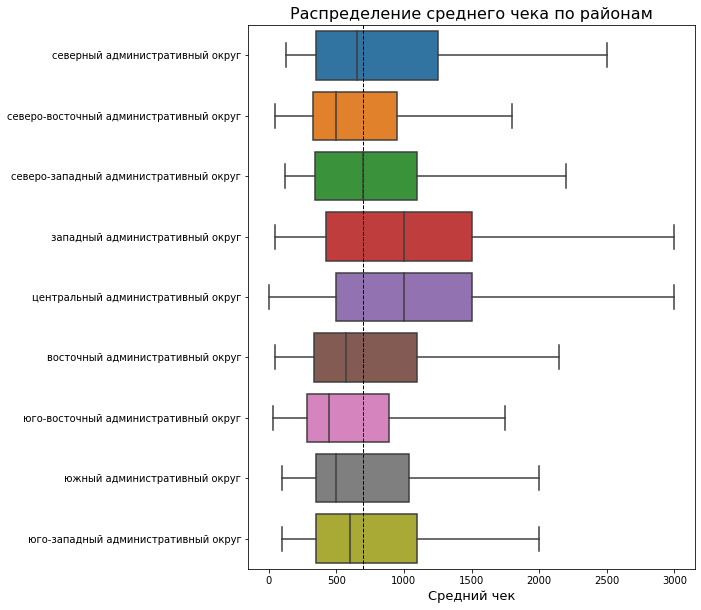

In [75]:
plt.figure(figsize=(8, 10))  
sns.boxplot(data=df, 
            y='district',  
            x='middle_avg_bill', 
            orient='h',  
            showfliers=False)
plt.title('Распределение среднего чека по районам', fontsize=16)
plt.ylabel('')
plt.xlabel('Средний чек', fontsize=13)
plt.axvline(x=700, color='black', linestyle='--', linewidth=1)  
plt.show()

**Вывод**

- В центральных и западных районах Москвы стоимость аренды коммерческих помещений значительно выше, что закладывается в стоимость услуг и блюд. Поэтому средний чек вэтих районах выше чем в других.
- С удалённостью от центра цены постепенно снижаются. Например, в северо-западном административном округе и северном административном округе медианные значения среднего чека составляют 700 и 650 рублей соответственно.
- Наименьшие значения среднего чека наблюдаются в Юго-Восточном административном округе и Южном административном округе - 450 и 500 рублей

Таким образом, удалённость от центра Москвы оказывает значительное влияние на уровень среднего чека в заведениях

---

### Промежуточный вывод



- Больше всего представлено заведений типа `кафе`, `рестораны` и `кофейни`. 
- `Центральный административный округ` имеет наибольшее количество заведений, что связано с высоким потоком туристов и развитой инфраструктурой. В этом районе преобладают рестораны, кафе и кофейни.
- Сетевые заведения составляют примерно 38%, а несетевые — 62%. `Сетевые бренды часто предпочитают категории с быстрым обслуживанием, такие как пиццерии и кофейни`. Важно отметить, что для популярных категорий (кафе, рестораны, кофейни) как сетевые, так и несетевые заведения составляют большую часть рынка.
- Центральные и западные районы демонстрируют наибольшие средние чеки. `Удаленность от центра снижает значение среднего чека`.
- `Чем выше ценовая категория, тем выше средний рейтинг.`
- При анализе количества посадочных мест были выявлены значения, сильно превышающие средние. Это может быть связано с ошибками в данных, техническими заглушками или специфическими условиями, такими как учет общей площади в ТЦ или ЖК, что искажает реальные данные о количестве мест.
- Среди 15 самых популярных сетевых брендов больше всего `кофейных сетей`, следом идут рестораны и пиццерии.

## Детальное исследование пиццерий

Проведите более детальное исследование заведений типа «пиццерия».
Ответьте на следующие вопросы:

---

### Анализ пиццерий в Москве

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

In [76]:
df_pizza = df[df['category'] == 'пиццерия']
counts_pizzas = df_pizza.shape[0]
print(f''' Всего {counts_pizzas} пиццерий в датасете''')

 Всего 633 пиццерий в датасете


- Всего 633 пиццерий.

In [77]:
print(f''' Доля пиццерий от общего числа заведений составила - {round(counts_pizzas/df.shape[0], 3)} или {round(counts_pizzas/df.shape[0], 3) * 100}%''') 

 Доля пиццерий от общего числа заведений составила - 0.075 или 7.5%


In [78]:
pizza_district = df_pizza.groupby('district')['id'].count().sort_values(ascending=False)
pizza_district

district
центральный административный округ         113
северный административный округ             77
южный административный округ                73
восточный административный округ            72
западный административный округ             71
северо-восточный административный округ     68
юго-западный административный округ         64
юго-восточный административный округ        55
северо-западный административный округ      40
Name: id, dtype: int64

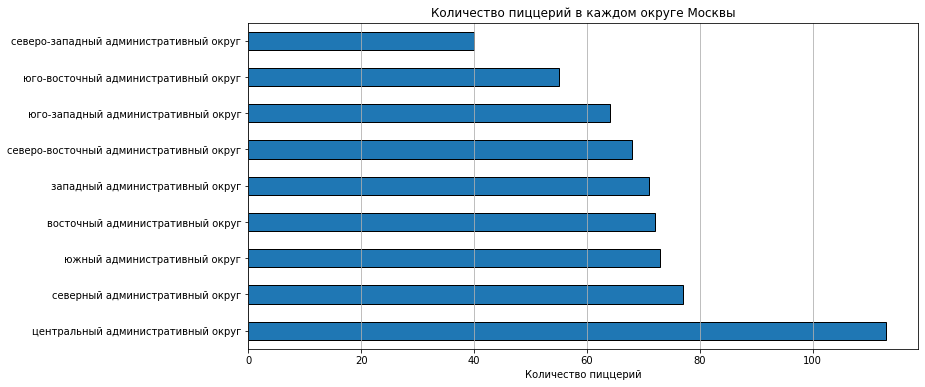

In [79]:
pizza_district.plot(
    kind='barh',
    edgecolor='black',
    rot=0,
    figsize=(12, 6)
)
plt.title('Количество пиццерий в каждом округе Москвы', fontsize=12)
plt.grid(axis='x')
plt.xlabel('Количество пиццерий')
plt.ylabel('')
plt.show()

- Больше всего пиццерий в `центральном административном округе`, а меньше всего в `северо-западном административном округе`

In [80]:
round(pizza_district/df.shape[0], 4) #доля пиццерий в каждом районе от общего количества заведений

district
центральный административный округ         0.0134
северный административный округ            0.0092
южный административный округ               0.0087
восточный административный округ           0.0086
западный административный округ            0.0085
северо-восточный административный округ    0.0081
юго-западный административный округ        0.0076
юго-восточный административный округ       0.0065
северо-западный административный округ     0.0048
Name: id, dtype: float64

- `Теперь узнаем долю пиццерий среди всех заведений округа`.

- Выведем общее количество раведений в каждом округе 

In [81]:
total_district = df.groupby('district')['id'].count().sort_values(ascending=False)
print(f'''Общее количество заведений в каждом округе:
{total_district}''')

Общее количество заведений в каждом округе:
district
центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: id, dtype: int64


- Теперь выведем количество пиццерий для каждого округа

In [82]:
print(f'''Количество пиццерий в каждом округе:
{pizza_district}''')

Количество пиццерий в каждом округе:
district
центральный административный округ         113
северный административный округ             77
южный административный округ                73
восточный административный округ            72
западный административный округ             71
северо-восточный административный округ     68
юго-западный административный округ         64
юго-восточный административный округ        55
северо-западный административный округ      40
Name: id, dtype: int64


- Рассчитаем процент пиццерий для каждого округа Москвы от всех заведений общественного питания

In [83]:
pizza_share = round((pizza_district / total_district) * 100, 2).sort_values(ascending=False)
pizza_share

district
северо-западный административный округ     9.78
юго-западный административный округ        9.03
восточный административный округ           9.02
северный административный округ            8.57
западный административный округ            8.35
южный административный округ               8.18
юго-восточный административный округ       7.70
северо-восточный административный округ    7.64
центральный административный округ         5.04
Name: id, dtype: float64

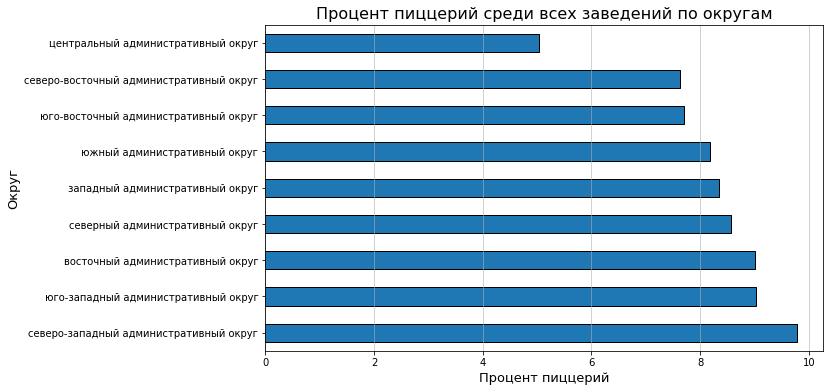

In [84]:
plt.figure(figsize=(10, 6))
pizza_share.plot(kind='barh', edgecolor='black')
plt.title('Процент пиццерий среди всех заведений по округам', fontsize=16)
plt.xlabel('Процент пиццерий', fontsize=13)
plt.ylabel('Округ', fontsize=13)
plt.grid(axis='x', alpha=0.7)
plt.show()

**Вывод**

- Пиццерии составляют небольшую долю от общего числа заведений - всего в датасете насчитывается `633` пиццерии. 
- Наибольшее количество пиццерий находится в `центральном административном округе` (113 заведений). Это может быть связано с высокой посещаемостью центра города, где сосредоточено большое число туристов, офисов и культурных объектов. Однако, если рассмотреть долю пиццерий среди всех заведений каждого округа, ситуация меняется и лидером по проценту пиццерий становится Северо-Западный административный округ, где пиццерии составляют 9.78% от всех заведений округа. Центральный округ, несмотря на лидерство по абсолютным значениям, имеет наименьшую долю пиццерий среди всех заведений - 5.04%. Это говорит о том, что в центре города большой выбор заведений других категорий (кафе, ресторанов), что делает долю пиццерий относительно меньшей по сравнению с другими округами.

---

### Характеристика типовой пиццерии

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [85]:
# Рассчитываем метрики
average_seats = df_pizza['seats'].median()
average_bill = df_pizza['middle_avg_bill'].median()
average_rating = df_pizza['rating'].median()
average_coffee_cup = df_pizza['middle_coffee_cup'].median()

print(f"Среднее количество посадочных мест: {average_seats:.2f}")
print(f"Средний чек: {average_bill:.2f}")
print(f"Средний рейтинг: {average_rating:.2f}")
print(f"Средняя стоимость одной чашки кофе: {average_coffee_cup:.2f}")

Среднее количество посадочных мест: 55.00
Средний чек: 600.00
Средний рейтинг: 4.30
Средняя стоимость одной чашки кофе: 150.00


- Визуализируем распределение количества посадочных мест в пиццериях

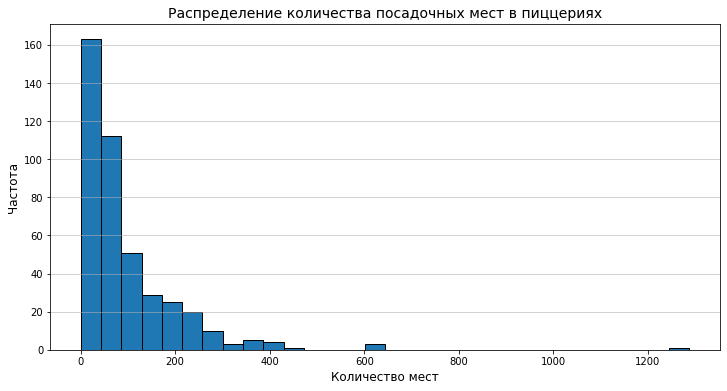

In [86]:
# гистограмма для количества посадочных мест
plt.figure(figsize=(12, 6))
plt.hist(df_pizza['seats'], bins=30, edgecolor='black')
plt.title('Распределение количества посадочных мест в пиццериях', fontsize=14)
plt.xlabel('Количество мест', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

- распределение является асимметричным с длинным правыым "хвостом". Это говорит о том, что большое количество мест встречается только в отдельных пиццериях, которые явно отличаются от среднего по размеру. Как мы выяснили в прошлых исследованиях, такие значения могут быть вызваны ошибками в данных, расположением заведения в ТЦ и крупных ЖК, где количество мест рассчитывается по общей площади, что искажает результаты.

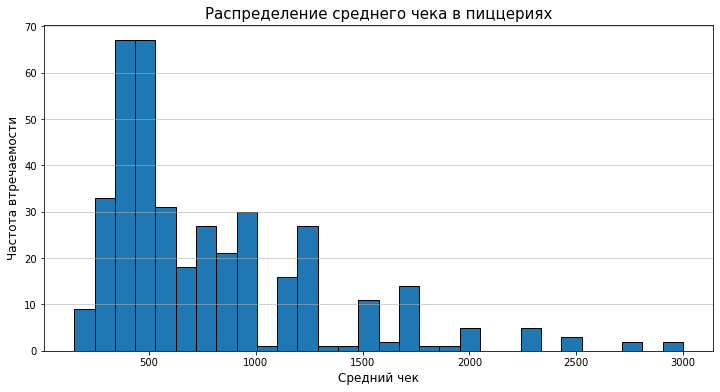

In [87]:
# гистограмма для среднего чека
plt.figure(figsize=(12, 6))
plt.hist(df_pizza['middle_avg_bill'], bins=30, edgecolor='black')
plt.title('Распределение среднего чека в пиццериях', fontsize=15)
plt.xlabel('Средний чек', fontsize=12)
plt.ylabel('Частота втречаемости', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [88]:
print(f'''Наиболее часто встречаемое значение среднего чека - {df_pizza['middle_avg_bill'].mode()[0]} руб''')

Наиболее часто встречаемое значение среднего чека - 500.0 руб


- График распределения среднего чека имеет правостороннюю асимметрию, что указывает на наличие небольшого числа заведений с высокими значениями среднего чека, которые существенно превышают средние показатели.
- Большинство пиццерий имеют средний чек в диапазоне около 500 рублей, что подтверждается пиком на гистограмме.
- Значения среднего чека превышают 2000 рублей только в редких случаях, что свидетельствует о существовании премиальных пиццерий. Однако такие заведения являются исключением, а не правилом.


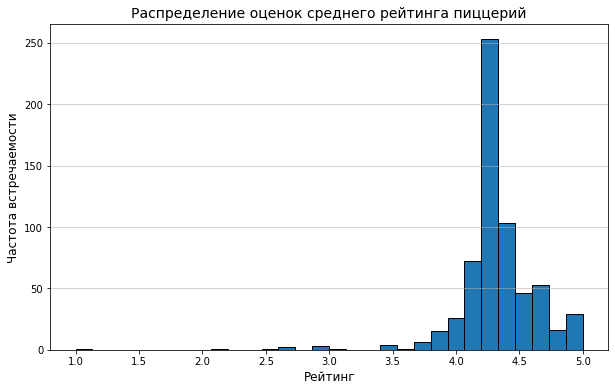

In [89]:
# гистограмма для среднего рейтинга пиццерий
plt.figure(figsize=(10, 6))
plt.hist(df_pizza['rating'], bins=30, edgecolor='black')
plt.title('Распределение оценок среднего рейтинга пиццерий', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

- распределение смещено в правую сторону. Большинство пиццерий имеют высокий рейтинг, в диапазоне от 4.1 до 4.5. Это говорит о достаточно хорошем уровне удовлетворенности клиентов
- наиболее частое значение рейтинга находится в районе 4.3
- рейтинги ниже 3.5 встречаются редко, что говорит об отсутствии большого количества некачественных заведений

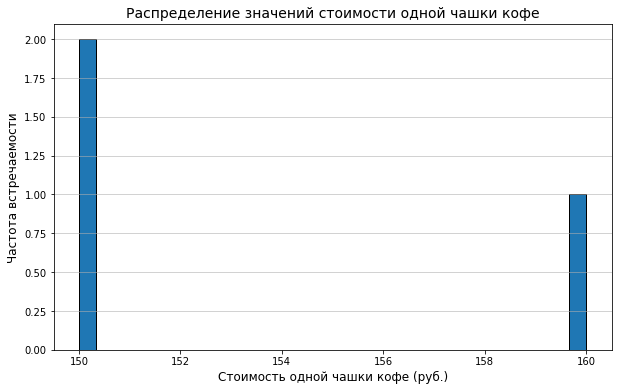

In [90]:
# гистограмма для среднего цены за чашечку кофе
plt.figure(figsize=(10, 6))
plt.hist(df_pizza['middle_coffee_cup'], bins=30, edgecolor='black')
plt.title('Распределение значений стоимости одной чашки кофе', fontsize=14)
plt.xlabel('Стоимость одной чашки кофе (руб.)', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [91]:
df_pizza['middle_coffee_cup'].value_counts()

150.0    2
160.0    1
Name: middle_coffee_cup, dtype: int64

- у нас `недостаточно данных для исследования`, так как только для трёх пиццерий известна средняя стоимость чашки кофе. Это делает любые выводы по этому показателю статистически нерепрезентативными

In [92]:
shape_24_7 = df_pizza['is_24_7'].sum()/df_pizza['is_24_7'].count()
shape_chain = df_pizza['chain'].sum()/df_pizza['chain'].count()
print(f"Доля круглосуточных пиццерий: {round(shape_24_7, 2)}")
print(f"Доля сетевых пиццерий: {round(shape_chain, 2)}")

Доля круглосуточных пиццерий: 0.05
Доля сетевых пиццерий: 0.52


- круглосуточные пиццерии составляют всего 5% от общего числа заведений. Это указывает на то, что формат круглосуточных пиццерий в целом не является широко распространенным, и, возможно не пользуется особой популярностью среди владельцев пиццерий. Это может быть связано с тем, что круглосуточное обслуживание требует дополнительных затрат на персонал и обслуживание.
- сетевые пиццерии составляют около 52% от всех заведений. Это свидетельствует о высокой популярности сетевых брендов. Сетевые заведения имеют свои преимущества, такие как узнаваемость бренда, стандарты качества и маркетинговая поддержка.

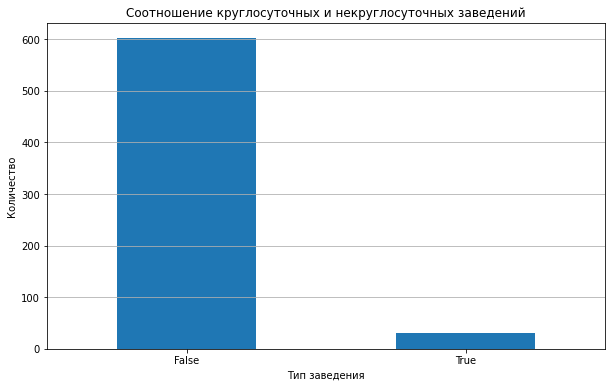

In [93]:
# строим столбчатую диаграмму для сравнения круглосуточных пиццерий и не круглосуточных
plt.figure(figsize=(10, 6))
df_pizza['is_24_7'].value_counts().plot(kind='bar', rot=0)
plt.title('Соотношение круглосуточных и некруглосуточных заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

- `True` - круглосуточное
- `False` - некрулосуточное

**Вывод**

При анализе характеристик типовой пиццерии было выявлено:
- `Средний чек составляет 600 руб`, а наиболее часто встречаемое значение среднего чека - 500 руб
- `Среднее количество посадочных мест: 55`
- `Средний рейтинг составляет 4.30`
- Из-за недостаточных данных для анализа стоимости средней чашки кофе было принято решение не делать выводов
- `Круглосуточные пиццерии` составляют всего `5%` от общего числа заведений. 
- `Сетевые пиццерии` составляют около `52%` от всех заведений пиццерий. Сетевые заведения имеют свои преимущества, такие как узнаваемость бренда, стандарты качества и маркетинговая поддержка.

`Типовая пиццерия` — это заведение с небольшим числом посадочных мест, средним чеком около 600 рублей и рейтингом выше 4. Большинство таких заведений не работают круглосуточно, а около половины из них принадлежат к сетевым брендам

---

### Распределение сетевых и несетевых пиццерий в округах Москвы

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

**`0`** - несетевые заведения

**`1`** - сетевые заведения

In [94]:
pd.pivot_table(df_pizza,
              index='district',
              columns='chain',
              values='id',
              aggfunc='count').sort_values(by=1, ascending=True)

chain,0,1
district,,
северо-западный административный округ,18,22
юго-восточный административный округ,26,29
северо-восточный административный округ,32,36
восточный административный округ,34,38
западный административный округ,33,38
юго-западный административный округ,26,38
северный административный округ,37,40
южный административный округ,32,41
центральный административный округ,65,48


- Меньше всего сетевых пиццерий находится в `северо-западном административном округе` – всего 22 заведения и в `юго-восточнoм административном округе` - 29

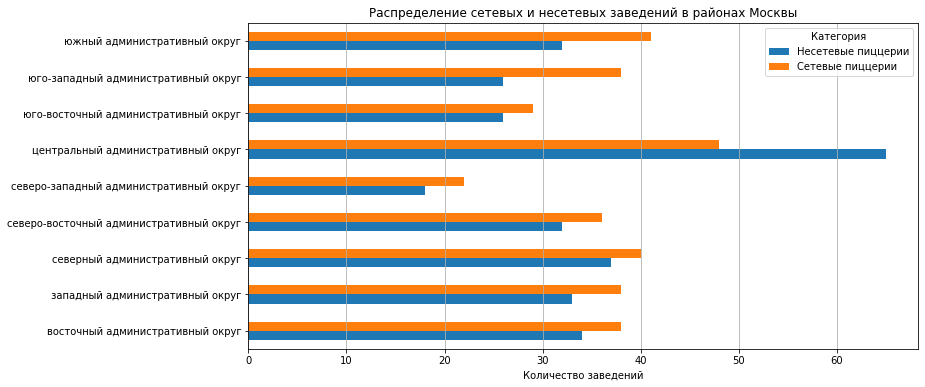

In [95]:
grouped_pizza = df_pizza.groupby('district')['chain'].value_counts().unstack(fill_value=0)
grouped_pizza.plot(kind='barh',
               title=f'Распределение сетевых и несетевых заведений в районах Москвы',
               legend=True,
               rot=0,
               figsize=(12, 6))
plt.grid(axis='x')
plt.legend(['Несетевые пиццерии', 'Сетевые пиццерии'], title='Категория')
plt.ylabel('')
plt.xlabel('Количество заведений')
# Выводим график
plt.show()

- Наибольшее количество сетевых пиццерий расположено в центральном административном округе - 48 заведений. Так как центр Москвы является наиболее популярным среди туристов это делает его привлекательным для сетевых брендов, которые отличаются своей узнаваемостью.
- Несетевые пиццерии также чаще всего расположены в центральном административном округе - 65 заведений. 
- Во многих округах Москвы сетевые заведения имеют небольшое преимущество по количеству над несетевыми. Однако в центральном округе ситуация иная: здесь несетевых пиццерий значительно больше.

Подсчитаем количество сетевых пиццерий в каждом округе

In [96]:
chain_pizza_1 = df_pizza[df_pizza['chain'] == 1].groupby('district')['id'].count().sort_values(ascending=False)
print(f'''Общее количество сетевых пиццерий в каждом округе:
{chain_pizza_1}''')

Общее количество сетевых пиццерий в каждом округе:
district
центральный административный округ         48
южный административный округ               41
северный административный округ            40
восточный административный округ           38
западный административный округ            38
юго-западный административный округ        38
северо-восточный административный округ    36
юго-восточный административный округ       29
северо-западный административный округ     22
Name: id, dtype: int64


- подсчитаем общее количество всех сетевых заведений

In [97]:
total_chain_1 = df[df['chain'] == 1].groupby('district')['id'].count()
print(f'''Общее количество всех сетевых заведений в каждом округе:
{total_chain_1}''')

Общее количество всех сетевых заведений в каждом округе:
district
восточный административный округ           283
западный административный округ            376
северный административный округ            346
северо-восточный административный округ    333
северо-западный административный округ     156
центральный административный округ         875
юго-восточный административный округ       220
юго-западный административный округ        302
южный административный округ               312
Name: id, dtype: int64


In [98]:
result = ((chain_pizza_1 / total_chain_1) * 100).round(2).sort_values(ascending=False)
print(f'''Процент сетевых пиццерий от всех сетевых заведений по округам Москвы:
{result}''')


Процент сетевых пиццерий от всех сетевых заведений по округам Москвы:
district
северо-западный административный округ     14.10
восточный административный округ           13.43
юго-восточный административный округ       13.18
южный административный округ               13.14
юго-западный административный округ        12.58
северный административный округ            11.56
северо-восточный административный округ    10.81
западный административный округ            10.11
центральный административный округ          5.49
Name: id, dtype: float64


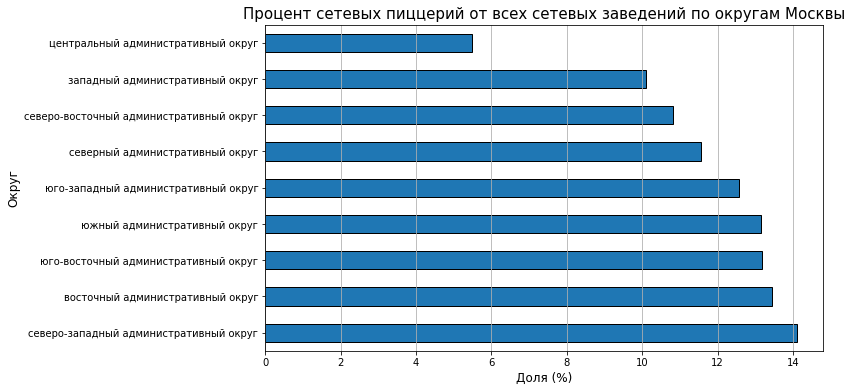

In [99]:
result.plot(kind='barh', figsize=(10, 6), edgecolor='black')
plt.title('Процент сетевых пиццерий от всех сетевых заведений по округам Москвы', fontsize=15)
plt.xlabel('Доля (%)', fontsize=12)
plt.ylabel('Округ', fontsize=12)
plt.grid(axis='x')
plt.show()

- Если же рассматривать процент сетевых пиццерий от всех сетевых заведений, то центральный район показывает наименьший процент - 5.49.
- Наибольший процент сетевых пиццерий находится в северо-западном административном округе

**Вывод**

В центральном административном округе сосредоточено наибольшее количество сетевых пиццерий - 48 заведений. Это объясняется популярностью центра Москвы среди туристов, офисных сотрудников и местных жителей, а также высокой концентрацией различных объектов инфраструктуры. Однако доля сетевых пиццерий от общего числа сетевых заведений в ЦАО составляет лишь 5,49%, что значительно ниже, чем в других округах. Такая низкая доля объясняется высокой насыщенностью округа заведениями общественного питания других категорий.
Северо-западный административный округ демонстрирует наибольшую долю сетевых пиццерий среди всех сетевых заведений — 14,10%. За ним следуют восточный (13,43%) и юго-восточный (13,18%) округа. Эти районы отличаются меньшим разнообразием заведений общественного питания, что делает сетевые пиццерии более заметными и востребованными.

В большинстве округов Москвы сетевые заведения немного преобладают по количеству над несетевыми, за исключением ЦАО, где несетевых пиццерий значительно больше.

Таким образом, ЦАО лидирует по количеству сетевых пиццериц, но их доля среди всех сетевых заведений здесь остается самой низкой. Наоборот, в северо-западном округе доля сетевых пиццерий самая высокая, что свидетельствует о популярности сетевых форматов в менее центральных районах Москвы.

---

### Промежуточный вывод

- В исследуемом датасете представлено `633` пиццерии, что составляет 7,5% от общего числа заведений общественного питания в Москве.
- `Типовая пиццерия в Москве` — это заведение со средним количеством посадочных мест около 55, со средним чеком около 600 рублей и рейтингом выше 4. Большинство таких заведений не работают круглосуточно, а около половины из них — это сетевые бренды.
- Больше всего пиццерий расположено в `центральном административном округе`.
- `Северо-западный административный округ` демонстрирует наибольшую долю сетевых пиццерий среди всех сетевых заведений — 14,10%. За ним следуют `восточный` (13,43%) и `юго-восточный` (13,18%) округа. Эти районы отличаются меньшим разнообразием заведений общественного питания, что делает сетевые пиццерии более заметными и востребованными.

- Открытие сетевой пиццерии

При открытии пиццерии стоит рассмотреть сетевые бренды, такие как Domino's Pizza и Додо Пицца, которые популярны в Москве и имеют высокий рейтинг. Цены на пиццу варьируются от 500 до 700 рублей, что соответствует среднему ценовому сегменту.

`Открытие пиццерии по франшизе` выгодно, поскольку она предоставляет готовую бизнес-модель с проверенной концепцией, маркетинговой поддержкой и узнаваемостью бренда. Это снижает риски и ускоряет запуск, в отличие от открытия собственного заведения, которое требует больше времени на разработку и привлечение клиентов. 

- Открытие несетевой пиццерии

`Для открытия несетевой пиццерии` в Москве важно учитывать специфику района. В центральном административном округе открытие пиццерии может быть рискованным, поскольку здесь уже сосредоточено множество несетевых заведений и аренда помещения будет достаточно высокой, что приведет к сильному увеличению среднего чека, столь нетипичному для пиццерий. Высокая конкуренция и насыщенность рынка требуют значительных вложений в маркетинг и создание действительно выдающегося продукта, чтобы выделиться среди множества предложений.

Вместо этого, стоит рассмотреть районы с высоким процентом сетевых пиццерий, такие как Северо-Западный или Восточный административные округа. Здесь можно продумать индивидуальный подход и уникальную концепцию, предлагая клиентам то, что не могут дать сетевые пиццерии. Например, это может быть пиццерия с элементами азиатской кухни, где традиционные рецепты пиццы сочетаются с необычными азиатскими ингредиентами. Такой подход позволит выделиться на фоне стандартных предложений сетевых брендов.

Средний чек в пиццериях Москвы составляет около 600 рублей. Установка схожих цен может быть стратегией для привлечения клиентов.

## Итоговый вывод и рекомендации

В ходе исследования были проанализированы данные 8402 заведения общественного питания в Москве. Данные включают:
- `id` идентификатор заведения 
- `name` название заведения
- `category` категория заведения
- `address` адрес заведения
- `district` административный район, в котором находится заведение
- `hours` информация о днях и часах работы
- `rating` рейтинг заведения по оценкам пользователей в Яндекс Картах
- `chain` число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки)
- `seats` количество посадочных мест
- `price` категория цен в заведении
- `avg_bill` строка, которая хранит среднюю стоимость заказа в виде диапазона
- `middle_avg_bill` число с оценкой среднего чека
- `middle_coffee_cup` число с оценкой одной чашки кофе
- `is_24_7` является ли заведение круглосуточным. True - да, False - нет

- Акцент иследования заключался в том, чтобы помочь инвесторам фонда "Shut Up and Take My Money" определить оптимальный формат заведения (кафе, ресторан, бар или пиццерия), его расположение, ценовую политику и основные характеристики. 

Анализ показал, что среди объектов общественного питания преобладают заведения типа кафе, рестораны и кофейни. Сетевые заведения составляют около 38% от общего числа, а несетевые — 62%. 

Центральный и западный районы Москвы показывают наибольшие средние чеки, в то время как удаленность от центра города снижает стоимость чека. Также было замечено, что чем выше ценовая категория заведения, тем чуть выше его рейтинг. Поэтому центральный и западный район более предпочтителен для открытия заведения.

Среди 15 самых популярных сетевых брендов наибольшее количество заведений представляют кофейни, затем идут рестораны и пиццерии.

Так как инвесторы фонда "Shut Up and Take My Money" поставили задачу определить оптимальный формат заведения (кафе, ресторан, бар или пиццерия), я рекомендую рассмотреть открытие `сетевой пиццерии` в центральном или западном районе Москвы. Среди вариантов франшиз стоит обратить внимание на `Domino's Pizza` и `Додо Пицца` — это известные бренды, входящие в топ-15 крупнейших сетей Москвы, с хорошей репутацией и высоким рейтингом.

Анализ показал, что заведения, специализирующиеся на определенном продукте (например, пиццерии), имеют более высокий средний рейтинг. Это объясняется тем, что клиенты точно знают, чего ожидать, и выбор конкретного направления снижает вероятность негативных отзывов, связанных с широким ассортиментом или низким качеством отдельных позиций.

Открытие пиццерии по франшизе имеет дополнительные преимущества, такие как узнаваемость бренда, поддержка в маркетинге, стандартизированные бизнес-процессы и готовая клиентская база, что снижает риски и ускоряет окупаемость бизнеса.

- Средняя окупаемость пиццерии сети Додо Пицца — 3 года. Вступительный взнос: 500 тысяч рублей + НДС. Бюджет на старт: от 20 млн рублей
- Средняя окупаемость пиццерии сети Domino's Pizza - от 30 месяцев (2.5 года). Вступительный взнос: 375 тысяч рублей + НДС. Инвестиции: от 13 млн рублей